In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('results_2.csv')

In [2]:
# Define a lambda function to convert integers to float
to_decimal = lambda x: x / 10

df['batching_obj_val'] = df['batching_obj_val'].apply(to_decimal)

In [3]:
# ejercicio 4 (calculo de mejora de batching contra greedy)

df['ov_gap%'] = (df['greedy_obj_val'] - df['batching_obj_val']) / df['greedy_obj_val']

# gap entre tiempo de greedy y tiempo batching
df['time_gap%'] = (df['greedy_time'] - df['batching_time']) / df['greedy_time']

# gap en rendimiento $/km
df['money/km_gap%'] = (df['greedy_solution_cost'] - df['batching_solution_cost']) / df['greedy_solution_cost']

In [4]:
# medias globales
mean_ov_gap = df['ov_gap%'].mean()
print(mean_ov_gap)
mean_time_gap = df['time_gap%'].mean()
print(mean_time_gap)
mean_rend_km_gap = df['money/km_gap%'].mean()
print(mean_rend_km_gap)

0.1588212700151724
-47.79935970283388
0.002309850899435992


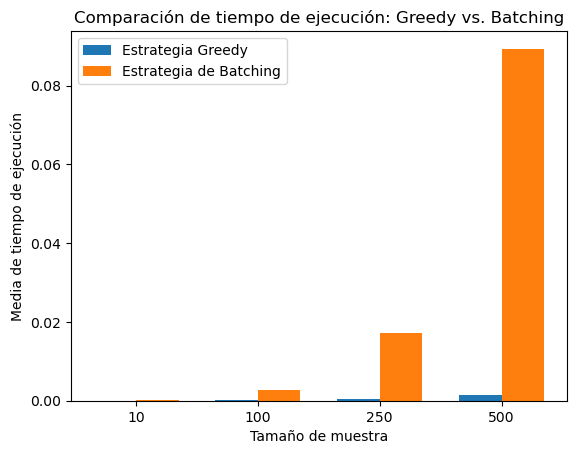

In [10]:
tamaños_muestras = [10, 100, 250, 500]

# Agrupamos la data por tamaño de muestra y calculamos la media para columna
grouped_df = df.groupby('n').mean().reset_index()

# Extraemos las medias de tiempo de ejecución
greedy_time = grouped_df['greedy_time']
batching_time = grouped_df['batching_time']

# Posicionamiento de las barras
bar_width = 0.35
r1 = range(len(sample_sizes))
r2 = [x + bar_width for x in r1]

# Creacion de barras para 
plt.bar(r1, greedy_time, width=bar_width, label='Estrategia Greedy')
plt.bar(r2, batching_time, width=bar_width, label='Estrategia de Batching')

# Ticks, labels y título
plt.xlabel('Tamaño de muestra')
plt.ylabel('Media de tiempo de ejecución')
plt.title('Comparación de tiempo de ejecución: Greedy vs. Batching')
plt.xticks([r + bar_width/2 for r in range(len(sample_sizes))], sample_sizes)

plt.legend()
plt.show()

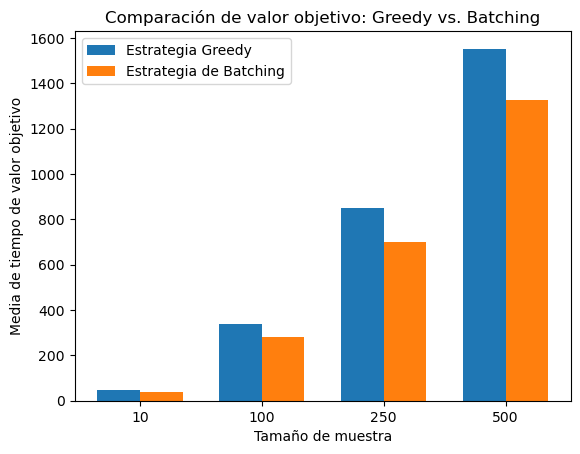

In [12]:
# Extraemos las medias de valor objetivo
greedy_ov = grouped_df['greedy_obj_val']
batching_ov = grouped_df['batching_obj_val']

# Posicionamiento de las barras
bar_width = 0.35
r1 = range(len(sample_sizes))
r2 = [x + bar_width for x in r1]

# Creacion de barras para 
plt.bar(r1, greedy_ov, width=bar_width, label='Estrategia Greedy')
plt.bar(r2, batching_ov, width=bar_width, label='Estrategia de Batching')

# Ticks, labels y título
plt.xlabel('Tamaño de muestra')
plt.ylabel('Media valor objetivo')
plt.title('Comparación de valor objetivo: Greedy vs. Batching')
plt.xticks([r + bar_width/2 for r in range(len(sample_sizes))], sample_sizes)

plt.legend()
plt.show()

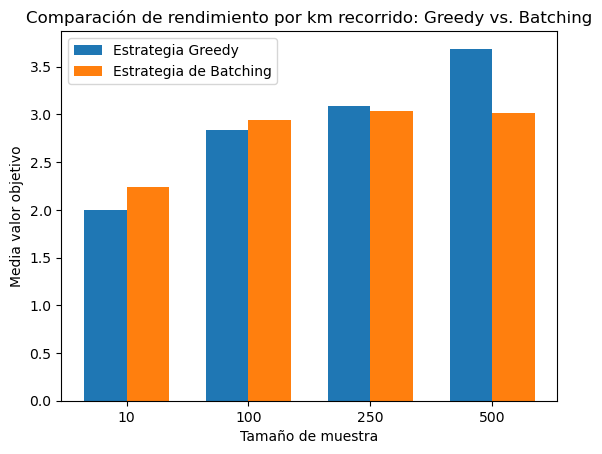

In [13]:
# Extraemos las medias de ingreso ($) por km recorido (distancia de recogida + viaje)
greedy_rend_km = grouped_df['greedy_solution_cost']
batching_rend_km = grouped_df['batching_solution_cost']

# Posicionamiento de las barras
bar_width = 0.35
r1 = range(len(sample_sizes))
r2 = [x + bar_width for x in r1]

# Creacion de barras para 
plt.bar(r1, greedy_rend_km, width=bar_width, label='Estrategia Greedy')
plt.bar(r2, batching_rend_km, width=bar_width, label='Estrategia de Batching')

# Ticks, labels y título
plt.xlabel('Tamaño de muestra')
plt.ylabel('Media valor objetivo')
plt.title('Comparación de rendimiento por km recorrido: Greedy vs. Batching')
plt.xticks([r + bar_width/2 for r in range(len(sample_sizes))], sample_sizes)

plt.legend()
plt.show()

In [7]:
# división en dataframes

# n = 10
df_10 = df[df['n'] == 10]
print(df_10['ov_gap%'].mean())
print(df_10['time_gap%'].mean())

# n = 100
df_100 = df[df['n'] == 100]
print(df_100['ov_gap%'].mean())
print(df_100['time_gap%'].mean())

# n = 250
df_250 = df[df['n'] == 250]
print(df_250['ov_gap%'].mean())
print(df_250['time_gap%'].mean())

# n = 500
df_500 = df[df['n'] == 500]
print(df_500['ov_gap%'].mean())
print(df_500['time_gap%'].mean())

0.14737849238019915
-41.90334388422869
0.16902052186012728
-44.85113479246384
0.17322120358886833
-47.02289611620615
0.14566486223149486
-57.42006401843688


In [8]:
df_test = pd.read_csv('nuevo_costo.csv')

df_test['rendimiento_km'] = df_test['tarifa'] / (df_test['recojida']+df_test['viaje'])

mean = df_test['rendimiento_km'].mean()

print(mean)

2.487036298581093
